<a href="https://colab.research.google.com/github/AmirMansurian/KNN-classification/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Name = Amir Mansurian**
*   **Student Number = 400210914**


In [ ]:
import KNN
import utils
import matplotlib.pyplot as plt
import seaborn as sn

Read databse, shuffle datas and split data to train and test sets. here i have choosed 80% of dataset to be training set. dataset is normalized because in the next section we calculate distance between training datas and test data.

In [ ]:
X, Y = utils.read_data('heart.csv', 'target')
X = utils.normalize_data(X)
X, Y = utils.suffle_data(X, Y)
X_train, Y_train, X_test, Y_test = utils.split_data(X, Y, 0.8)

here we create example of KNN class with k number equal to 5 and fit model on the training set and predict labels of test set.


In [ ]:
knn = KNN.KNN(5)
predict = knn.predict(X_train, Y_train, X_test)

confusion matrix of the model is calculated and ploted below :

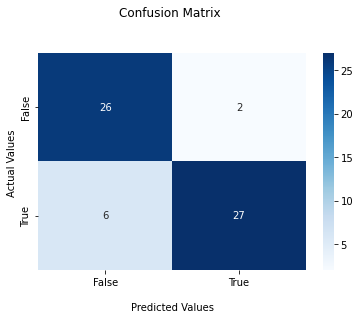

In [ ]:
confusion_matrix = utils.confusion_matrix(Y_test, predict)

ax = sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
also i have calculated parameters of the model below :

In [ ]:
Accuracy, Precision, Recall, F1score = utils.report(Y_test, predict)
print('Accuracy : ', Accuracy*100, ' %')
print('Precision : ', Precision*100, ' %')
print('Recall : ', Recall*100, ' %')
print('F1score : ', F1score*100, ' %')

Accuracy :  86.88524590163934  %
Precision :  92.85714285714286  %
Recall :  81.25  %
F1score :  86.66666666666666  %


now we are goinig to create 15 models with vaing k between 1-15. so we have  a loop on the number of K and save results of the accuracy on the test set and trainnig set :

In [ ]:
accuracy_test = [0]*15
accuracy_train = [0]*15

for k in range(1, 16) :
  knn = KNN.KNN(k)
  predict = knn.predict(X_train, Y_train, X_test)
  accuracy_test[k-1] = utils.precision(Y_test, predict)

for k in range(1, 16) :
  knn = KNN.KNN(k)
  predict = knn.predict(X_train, Y_train, X_train)
  accuracy_train[k-1] = utils.precision(Y_train, predict)


at the last section we plot accuracy for train and test set for different values of K. as we can see in the diagram, when K = 1 accuracy on the train set is 100 % because model will find exactly the test data as it's neighbor. as K gets grater, accuracy on the test set will increase and accuracy of the train set will decrease. for K >=5 train set accuracy will decrease and accuracy of the test set has small changes and for k>=12 accuracy of both test and train set will decrease because the locality of the datas are ignored. best value for K is 5 because according to occam's rule we prefer simpler models. so K = 5 is the best value for K on this dtaset.

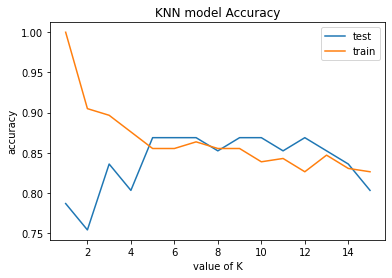

In [ ]:
step = [i for i in range(1,16)]

plt.plot(step, accuracy_test)
plt.plot(step, accuracy_train)
plt.title('KNN model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('value of K')
plt.legend(['test', 'train'], loc='upper right')
plt.show()